<a href="https://colab.research.google.com/github/Beepeen78/BDM-Project/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# I have imported the required libraries for the data visualization



In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# I have imported the dataset

In [88]:
data = pd.read_csv('/content/btc_2015_2024.csv')

In [117]:
data.head()

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,...,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close,month
0,2015-01-02,314.079010,315.838989,313.565002,315.032013,7860650.0,100.000000,100.000000,-66.666667,-66.666667,...,314.648333,314.640503,314.644418,0.017568,314.640503,2.273987,4.193073,4.275997,281.082001,1
1,2015-01-03,314.846008,315.149994,281.082001,281.082001,33054400.0,1.938583,2.096744,-100.000000,-100.000000,...,303.009081,303.454336,303.232458,-1.030403,303.454336,34.067993,15.719617,14.951008,264.195007,1
2,2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100.0,1.235506,1.375421,-110.693896,-110.693896,...,292.715747,293.639503,293.178382,-2.091487,293.639503,29.618011,20.033779,19.034849,274.473999,1
3,2015-01-05,265.084015,278.341003,265.084015,274.473999,43962800.0,21.462825,19.523695,-76.487357,-76.487357,...,288.769813,289.806403,289.286389,-2.215008,289.806403,14.145996,18.468441,17.907070,286.188995,1
4,2015-01-06,274.610992,287.553009,272.696014,286.188995,23245700.0,38.272356,34.350787,-37.070244,-37.070244,...,288.295540,289.203501,288.744005,-1.746686,289.203501,14.856995,17.613461,17.300126,294.337006,1


# Data information and format

In [90]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3355 entries, 0 to 3354
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            3355 non-null   object 
 1   open            3355 non-null   float64
 2   high            3355 non-null   float64
 3   low             3355 non-null   float64
 4   close           3355 non-null   float64
 5   volume          3355 non-null   float64
 6   rsi_7           3355 non-null   float64
 7   rsi_14          3355 non-null   float64
 8   cci_7           3355 non-null   float64
 9   cci_14          3355 non-null   float64
 10  sma_50          3355 non-null   float64
 11  ema_50          3355 non-null   float64
 12  sma_100         3355 non-null   float64
 13  ema_100         3355 non-null   float64
 14  macd            3355 non-null   float64
 15  bollinger       3355 non-null   float64
 16  TrueRange       3355 non-null   float64
 17  atr_7           3355 non-null   f

In [91]:
data['date'] = pd.to_datetime(data['date']) # data type changed from object to datetime

In [92]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3355 entries, 0 to 3354
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            3355 non-null   datetime64[ns]
 1   open            3355 non-null   float64       
 2   high            3355 non-null   float64       
 3   low             3355 non-null   float64       
 4   close           3355 non-null   float64       
 5   volume          3355 non-null   float64       
 6   rsi_7           3355 non-null   float64       
 7   rsi_14          3355 non-null   float64       
 8   cci_7           3355 non-null   float64       
 9   cci_14          3355 non-null   float64       
 10  sma_50          3355 non-null   float64       
 11  ema_50          3355 non-null   float64       
 12  sma_100         3355 non-null   float64       
 13  ema_100         3355 non-null   float64       
 14  macd            3355 non-null   float64       
 15  boll

In [93]:
print(data.describe())

               open          high           low         close        volume  \
count   3355.000000   3355.000000   3355.000000   3355.000000  3.355000e+03   
mean   15721.070484  16089.307350  15332.719771  15740.088803  1.736667e+10   
std    16793.666158  17200.680642  16358.044240  16813.548463  1.921777e+10   
min      176.897003    211.731003    171.509995    178.102997  7.860650e+06   
25%     1250.579956   1267.434998   1225.614990   1250.580017  4.422415e+08   
50%     8825.343750   9033.470703   8657.187500   8830.750000  1.328112e+10   
75%    26621.138672  27050.690429  26319.361328  26691.920899  2.773545e+10   
max    68341.054688  70083.054688  68053.125000  68498.882813  3.509679e+11   

             rsi_7       rsi_14        cci_7       cci_14        sma_50  \
count  3355.000000  3355.000000  3355.000000  3355.000000   3355.000000   
mean     54.056786    53.731677    12.980185    18.952715  15336.131060   
std      18.574038    14.330170   101.812254   111.746313  1631

# Plotting time series data for closing Price

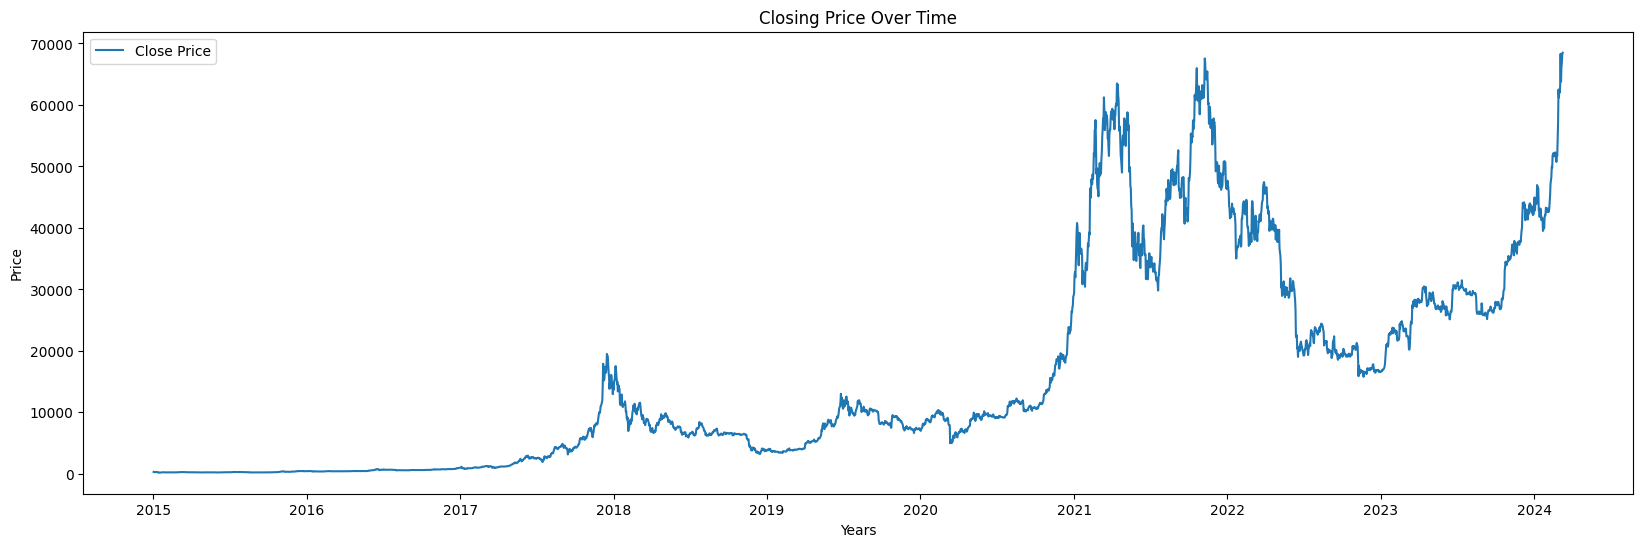

In [127]:
plt.figure(figsize=(20, 6))
plt.plot(data['date'], data['close'], label='Close Price')
plt.xlabel('Years')
plt.ylabel('Price')
plt.title('Closing Price Over Time')
plt.legend()
plt.show()

# Visualizing volume trends

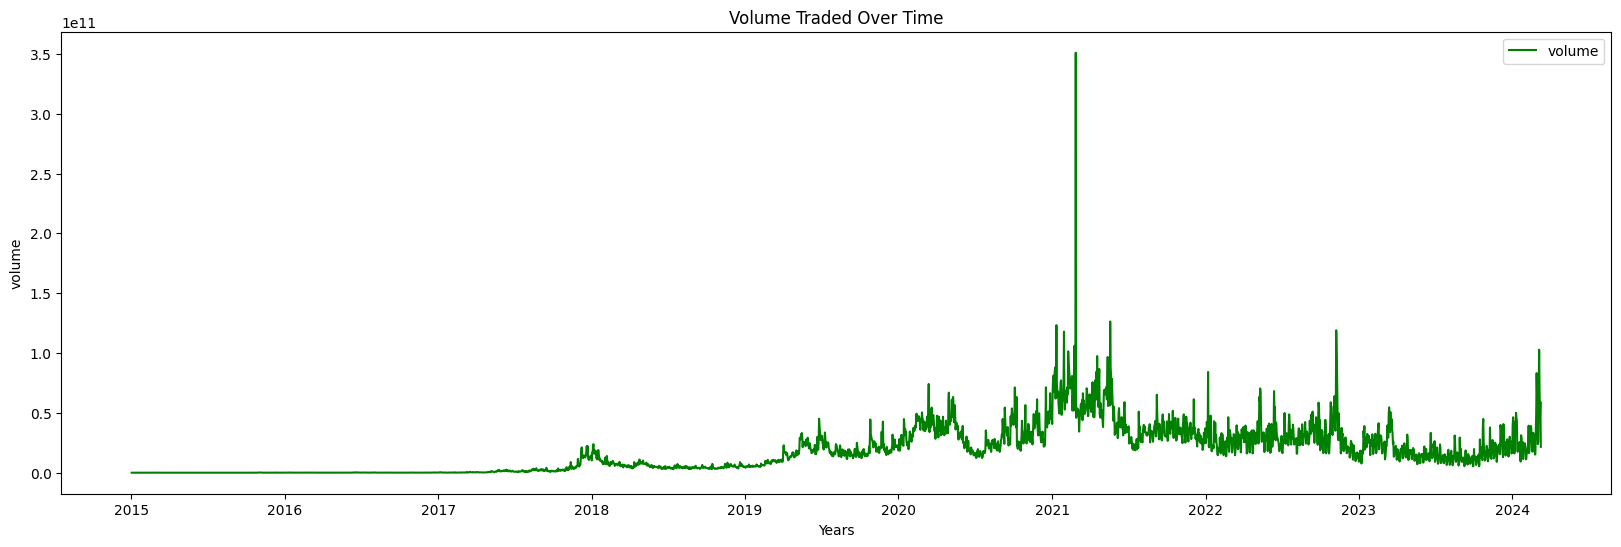

In [95]:
plt.figure(figsize=(20, 6))
plt.plot(data['date'], data['volume'], label='volume', color='green')
plt.xlabel('Years')
plt.ylabel('volume')
plt.title('Volume Traded Over Time')
plt.legend()
plt.show()

# Average closing Price per year

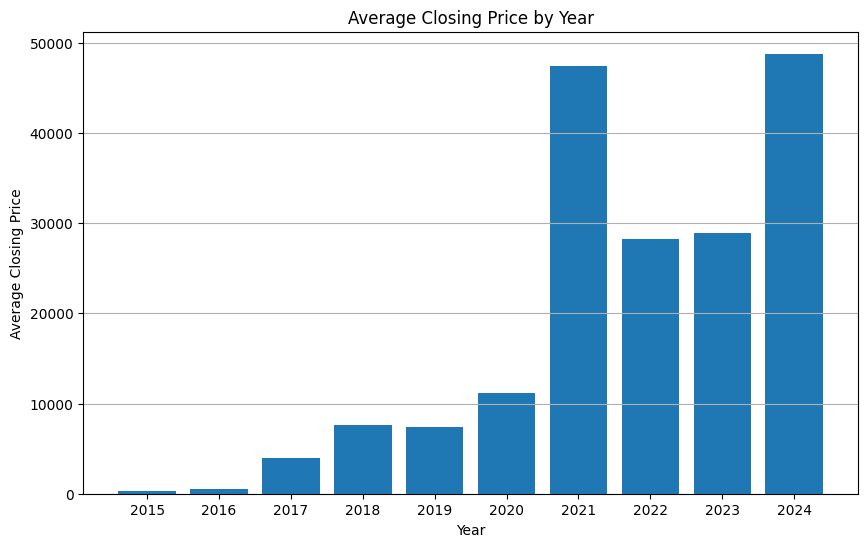

In [121]:
plt.figure(figsize=(10, 6))
plt.bar(average_close_by_year['Year'], average_close_by_year['close'])
plt.xlabel('Year')
plt.ylabel('Average Closing Price')
plt.title('Average Closing Price by Year')
plt.xticks(average_close_by_year['Year'])
plt.grid(axis='y')
plt.show()

# Total Trading volume per month

In [101]:
data['month'] = data['date'].dt.month

In [102]:
total_volume_by_month = data.groupby('month')['volume'].sum().reset_index()

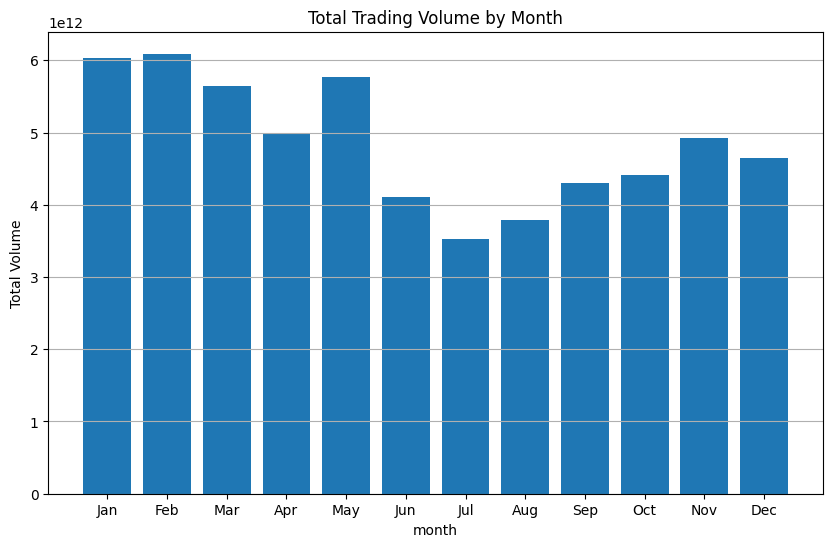

In [103]:
plt.figure(figsize=(10, 6))
plt.bar(total_volume_by_month['month'], total_volume_by_month['volume'])
plt.xlabel('month')
plt.ylabel('Total Volume')
plt.title('Total Trading Volume by Month')
plt.xticks(total_volume_by_month['month'], labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.show()

# Scatterplot of RSI and MACD

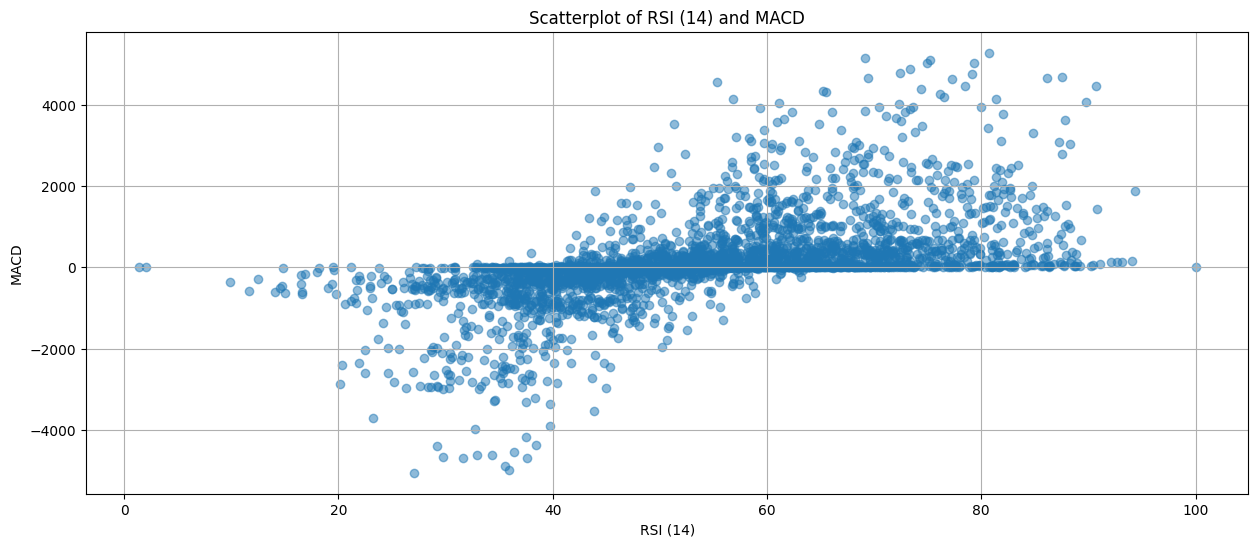

In [128]:
plt.figure(figsize=(15, 6))
plt.scatter(data['rsi_14'], data['macd'], alpha=0.5)
plt.xlabel('RSI (14)')
plt.ylabel('MACD')
plt.title('Scatterplot of RSI (14) and MACD')
plt.grid(True)
plt.show()

# Generating Correlation Heatmap

In [105]:
correlation_matrix = data.corr()

<ipython-input-105-19e8f3752a40>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


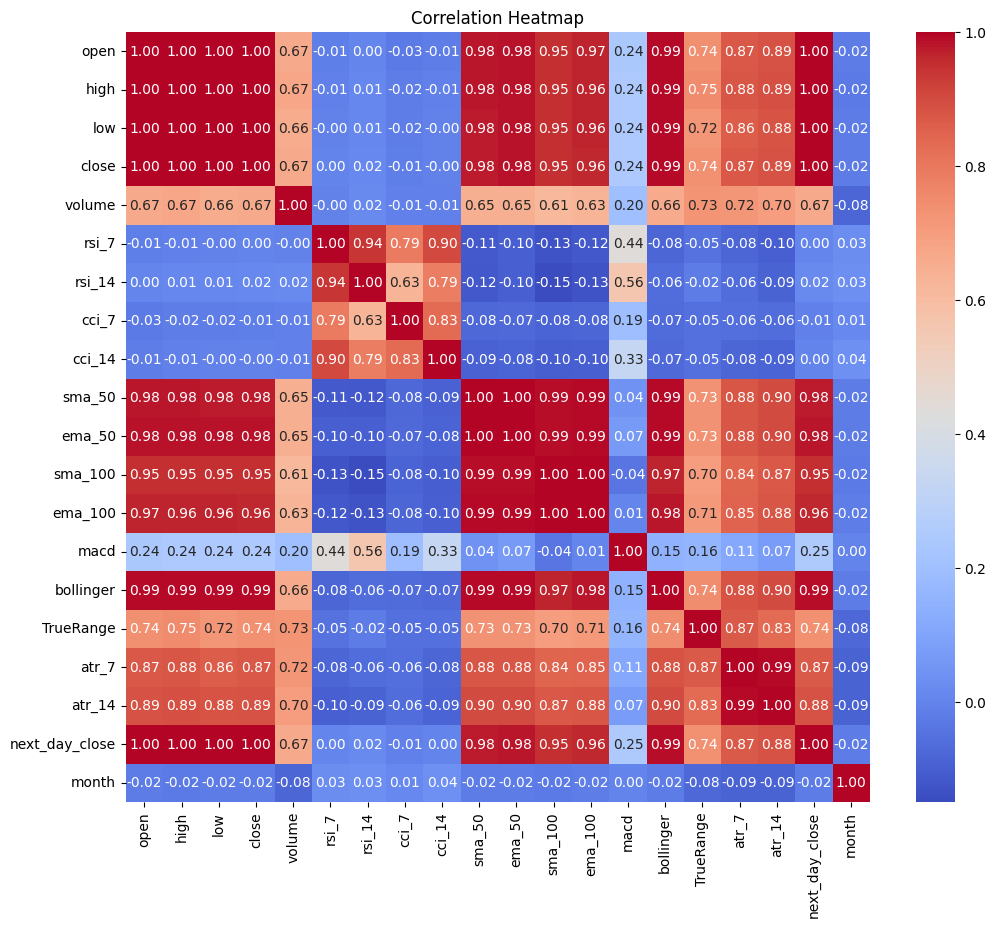

In [106]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Split the Data into Train and Test Sets:

In [107]:
X = data.drop(columns=['next_day_close'])  # Features excluding the target variable
y = data['next_day_close']  # Target variable

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [109]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2684, 20)
X_test shape: (671, 20)
y_train shape: (2684,)
y_test shape: (671,)


# Utilize Standard Scaling:

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [111]:
X = data[['open', 'high', 'low', 'close', 'volume']]
y = data['next_day_close']

In [112]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [113]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [114]:
print("\nStandardized Features:")
print(X_scaled_df)


Standardized Features:
          open      high       low     close    volume
0    -0.917565 -0.917163 -0.918288 -0.917555 -0.903403
1    -0.917520 -0.917203 -0.920274 -0.919575 -0.902092
2    -0.919527 -0.918826 -0.921709 -0.920579 -0.900917
3    -0.920483 -0.919343 -0.921252 -0.919968 -0.901525
4    -0.919916 -0.918807 -0.920787 -0.919271 -0.902603
...        ...       ...       ...       ...       ...
3350  3.133790  3.086461  2.689670  2.858901  4.446355
3351  2.861921  2.997341  2.905178  2.996050  2.674151
3352  3.000309  3.020134  3.076793  3.044748  1.541661
3353  3.050237  3.139515  3.111944  3.126517  2.177279
3354  3.131301  3.057529  3.223384  3.138342  0.220817

[3355 rows x 5 columns]


# Perform Linear Regression:

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=0)

# Initialize Linear Regression model
model = LinearRegression()

# Training the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)

# Optionally, we can also print the model coefficients and intercept
print("\nModel Coefficients:")
for feature, coef in zip(X_scaled_df.columns, model.coef_):
    print(f"{feature}: {coef}")
print("Intercept:", model.intercept_)

Mean Squared Error (MSE): 599781.0787510083
R-squared: 0.9978755902881601

Model Coefficients:
open: 2634.419251622201
high: -1956.4377015785967
low: -1838.2513640334346
close: 17985.57844178361
volume: -15.632637628772727
Intercept: 15759.129450359835


In [116]:
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (Coefficient of Determination)
r_squared = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (Coefficient of Determination):", r_squared)

Mean Squared Error (MSE): 599781.0787510083
Root Mean Squared Error (RMSE): 774.4553432903722
R-squared (Coefficient of Determination): 0.9978755902881601
